In [31]:
# import modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
import imblearn
import itertools
import warnings
import plotly.graph_objects as go
import pandas as pd

# import all the necessary modules of sklearn (ML models)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

# set the encoder and scaler
scaler = StandardScaler()
encoder = LabelEncoder()

# random forest
random_forest_classifier = RandomForestClassifier();

# warnings and graph points
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision=3)
sns.set_theme(style="darkgrid")

# plot points
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10


# LOAD DATA

In [32]:
# train and test file import
train_file_path = './Train_data.csv'
test_file_path = './Test_data.csv'

# read csv files of train and test data
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# drop nulls
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# drop duplicate
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

In [33]:
# mount drive- another approach to upload train and test files
# from google.colab import drive
# drive.mount('/content/drive')

In [34]:
# print head for train data
print(train_data.head(5))
print("Training data rows and columns - it has ",train_data.shape[0]," rows & ", train_data.shape[1]," columns")


   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0      

In [35]:
# print head for test data
print(test_data.head(5))
print("Testing data rows and columns - it has ",test_data.shape[0]," rows & ", test_data.shape[1]," columns")

   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          0                0   
4               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0

# EXPLORATORY ANALYSIS

In [36]:
# train data description
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
# Print value counts for 'num_outbound_cmds' column in train_data and test_data
train_num_outbound_cmds_counts = train_data['num_outbound_cmds'].value_counts()
test_num_outbound_cmds_counts = test_data['num_outbound_cmds'].value_counts()

# train and test data evalution
print("Train Data 'num_outbound_cmds' Value Counts:")
print(train_num_outbound_cmds_counts)

print("\nTest Data 'num_outbound_cmds' Value Counts:")
print(test_num_outbound_cmds_counts)

# drop columns which are not need in the evaluation
train_data.drop(columns=['num_outbound_cmds'], inplace=True)
test_data.drop(columns=['num_outbound_cmds'], inplace=True)

# count values
class_value_counts = train_data['class'].value_counts()
print("\nTrain Data 'class' Value Counts:")
print(class_value_counts)


Train Data 'num_outbound_cmds' Value Counts:
num_outbound_cmds
0    25192
Name: count, dtype: int64

Test Data 'num_outbound_cmds' Value Counts:
num_outbound_cmds
0    22487
Name: count, dtype: int64

Train Data 'class' Value Counts:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


# SCALING NUMERICAL ATTRIBUTES

In [38]:
# Extract numerical columns from the training data
colms = train_data.select_dtypes(include=['float64', 'int64']).columns

# fit the train and test data
sc_train = scaler.fit_transform(train_data[colms])
sc_test = scaler.transform(test_data[colms])

sc_train_df = pd.DataFrame(sc_train, columns=colms)
sc_test_df = pd.DataFrame(sc_test, columns=colms)


# ENCODING CATEGORICAL ATTRIBUTES

In [39]:
# train and test data types
category_train = train_data.select_dtypes(include=['object']).copy()
category_test = test_data.select_dtypes(include=['object']).copy()

train_cat = category_train.apply(encoder.fit_transform)
test_cat = category_test.apply(encoder.fit_transform)

# encoded train and test data
encoded_train = train_cat.drop(columns=['class'])
cat_Ytrain = train_cat[['class']]


train_x = pd.concat([sc_train_df, encoded_train], axis=1)
train_y = train_data['class']

test_df = pd.concat([sc_test_df, test_cat], axis=1)


train_shape = train_x.shape
test_shape = test_df.shape

print("Train DataFrame Shape:", train_shape)
print("Test DataFrame Shape:", test_shape)

# this is the fratures which we want to check
val_features = ['protocol_type', 'service', 'flag']

# for each feature we can check and draw the pie chart
i = 0
while i < len(val_features):
    feature = val_features[i]

    # unique values
    unique_values = train_x[feature].unique()
    value_count = len(unique_values)

    print(f"The unique values of {feature} are:", unique_values)
    print(f"Number of unique values for {feature}: {value_count}\n")

    # count the vals for each feature
    val_counts = train_x[feature].value_counts()
    fig_generation = go.Figure()
    fig_generation.add_trace(go.Pie(
        labels=val_counts.index,
        values=val_counts
    ))

    # pie chart generation for the features
    fig_generation.update_traces(textposition='inside')
    fig_generation.update_layout(
        title=f"Pie Chart of {feature}",
        uniformtext_minsize=12,
        uniformtext_mode='hide'
    )

    # show the figure
    fig_generation.show()


    # increament the feature and go to next
    i += 1


Train DataFrame Shape: (25192, 40)
Test DataFrame Shape: (22544, 40)
The unique values of protocol_type are: [1 2 0]
Number of unique values for protocol_type: 3



The unique values of service are: [19 41 46 22 48 33 35 13 32 57 17 11 55 63  2 51  6 62 34 61  3 10 18  4
 29 14 20 64 56 23 15 65 25 26 12 27 30 54 31 28 52 59 21 16 40  9 39  5
  7 53  8 50 37 44 38  0 43 45 58 42 47 36 49  1 60 24]
Number of unique values for service: 66



The unique values of flag are: [ 9  5  1  4 10  2  6  3  8  7  0]
Number of unique values for flag: 11



In [40]:
# Ratio of each unique feature

for f in val_features:
    val_counts = train_x[f].value_counts()
    fig_generation = go.Figure()
    fig_generation.add_trace(go.Pie(
        labels=val_counts.index,
        values=val_counts
    ))

    # update the traces
    fig_generation.update_traces(textposition='inside')

    # pie chart generation
    fig_generation.update_layout(
        title=f"Pie Chart of {f}",
        uniformtext_minsize=12,
        uniformtext_mode='hide'
    )

    # show the pie chart for each feature
    fig_generation.show()

# FEATURE SELECTION

Selected Features: ['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'protocol_type', 'service', 'flag']


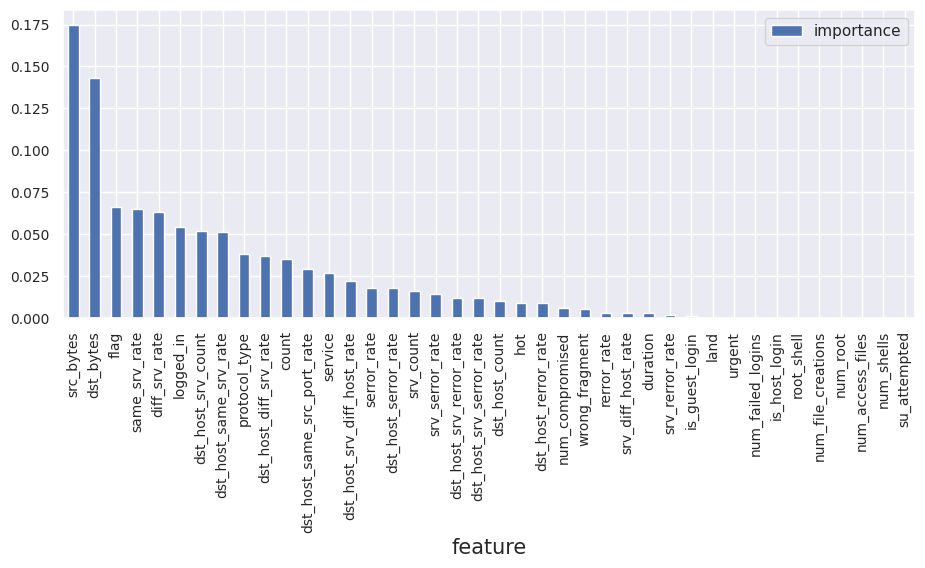

In [41]:
# Fit the Random Forest Classifier to the training data
random_forest_classifier.fit(train_x, train_y)
score = np.round(random_forest_classifier.feature_importances_, 3)
importance_s = pd.DataFrame({
    'feature': train_x.columns,
    'importance': score
})

# importance of the features
importance_s = importance_s.sort_values('importance', ascending=False).set_index('feature')
plt.rcParams['figure.figsize'] = (11, 4)
importance_s.plot.bar()
r_f_e = RFE(random_forest_classifier, n_features_to_select=15)
r_f_e.fit(train_x, train_y)
feature_map = list(itertools.zip_longest(r_f_e.get_support(), train_x.columns))
select_features = [v for i, v in feature_map if i]
print("Selected Features:", select_features)


# DATASET PARTITION

In [42]:
# Split the data into training and testing sets with a 70%/30% ratio
train_size_ratio = 0.70
random_seed = 2

# teain and test data shape
X_train, X_test, Y_train, Y_test = train_test_split(
    train_x,
    train_y,
    train_size=train_size_ratio,
    random_state=random_seed
)

print("Training Set Shape:", X_train.shape, Y_train.shape)
print("Testing Set Shape:", X_test.shape, Y_test.shape)


Training Set Shape: (17634, 40) (17634,)
Testing Set Shape: (7558, 40) (7558,)


# FITTING MODELS

In [43]:
# Initialize classifiers
KNN = KNeighborsClassifier(n_jobs=-1)
LGR = LogisticRegression(n_jobs=-1, random_state=0)
BNB = BernoulliNB()
DTC = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)

# Fit classifiers on the training data
KNN.fit(X_train, Y_train)  # Train the K-Nearest Neighbors classifier
LGR.fit(X_train, Y_train)  # Train the Logistic Regression classifier
BNB.fit(X_train, Y_train)  # Train the Bernoulli Naive Bayes classifier
DTC.fit(X_train, Y_train)  # Train the Decision Tree classifier with entropy criterion


DecisionTreeClassifier(criterion='entropy', random_state=0)

# EVALUATE MODELS

In [44]:
# models eval
models = [
    ('Naive Bayes Classifier - ', BNB),
    ('Decision Tree Classifier - ', DTC),
    ('KNeighborsClassifier - ', KNN),
    ('LogisticRegression - ', LGR)
]


i = 0

# for loop for each model
while i < len(models):

    model_name, model = models[i]


    # caluculate the scores and accuracy
    scores = cross_val_score(model, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, model.predict(X_train))


    confusion_matrix = metrics.confusion_matrix(Y_train, model.predict(X_train))
    classification = metrics.classification_report(Y_train, model.predict(X_train))

    # Output the evaluation results for the current model
    print(f'<<<<<<<<<==================== {model_name} Model - Evaluation ====================>>>>>>>>>')
    print()
    print("Accuracy:", accuracy)
    print()
    print("Cross Validation of the data set for intrusion detection - Mean Score:", scores.mean())
    print()
    print("Classification report of the data set for intrusion detection:\n", classification)
    print()
    print("Confusion matrix of the data set for intrusion detection:\n", confusion_matrix)
    print()

    # increment by 1 and go to the next model
    i += 1


<<<<<<<<<==================== Naive Bayes Classifier -  Model - Evaluation ====================>>>>>>>>>

Accuracy: 0.9071679709651809

Cross Validation of the data set for intrusion detection - Mean Score: 0.9071666840303904

Classification report of the data set for intrusion detection:
               precision    recall  f1-score   support

     anomaly       0.95      0.85      0.90      8245
      normal       0.88      0.96      0.92      9389

    accuracy                           0.91     17634
   macro avg       0.91      0.90      0.91     17634
weighted avg       0.91      0.91      0.91     17634


Confusion matrix of the data set for intrusion detection:
 [[7000 1245]
 [ 392 8997]]

<<<<<<<<<==================== Decision Tree Classifier -  Model - Evaluation ====================>>>>>>>>>

Accuracy: 1.0

Cross Validation of the data set for intrusion detection - Mean Score: 0.9960869883971739

Classification report of the data set for intrusion detection:
               pr

# VALIDATING MODELS

<<<<<<<<<<==================== Naive Bayes Classifier -  Model Test Results ====================>>>>>>>>>>

Model Accuracy:
 0.906721354855782

Classification report:
               precision    recall  f1-score   support

     anomaly       0.94      0.85      0.89      3498
      normal       0.88      0.95      0.92      4060

    accuracy                           0.91      7558
   macro avg       0.91      0.90      0.91      7558
weighted avg       0.91      0.91      0.91      7558


Confusion matrix:
 [[2981  517]
 [ 188 3872]]

<<<<<<<<<<==================== Decision Tree Classifier -  Model Test Results ====================>>>>>>>>>>

Model Accuracy:
 0.9947075946017465

Classification report:
               precision    recall  f1-score   support

     anomaly       0.99      1.00      0.99      3498
      normal       1.00      0.99      1.00      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg  

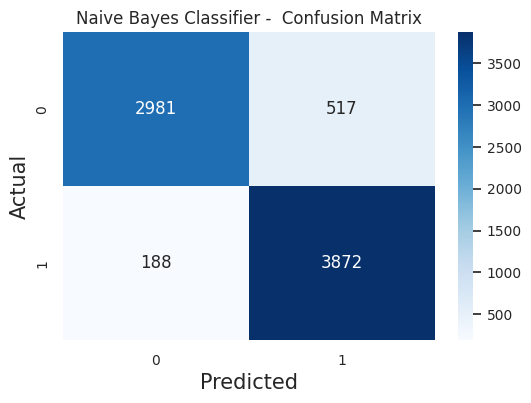

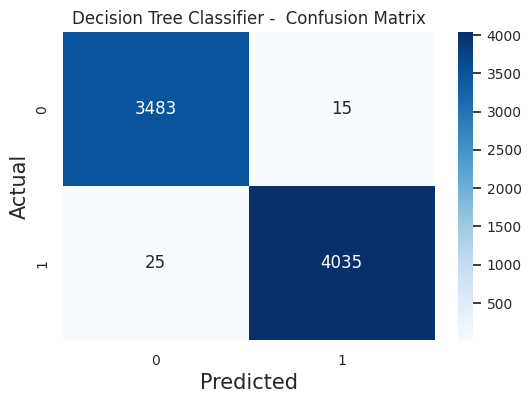

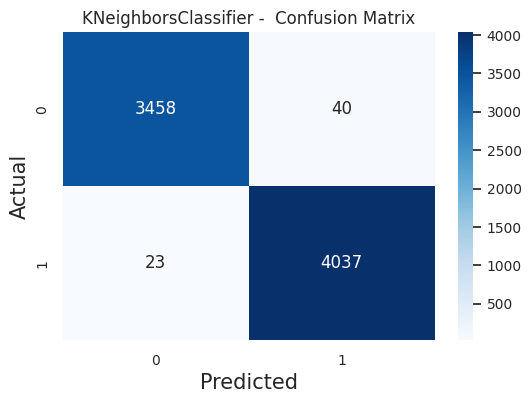

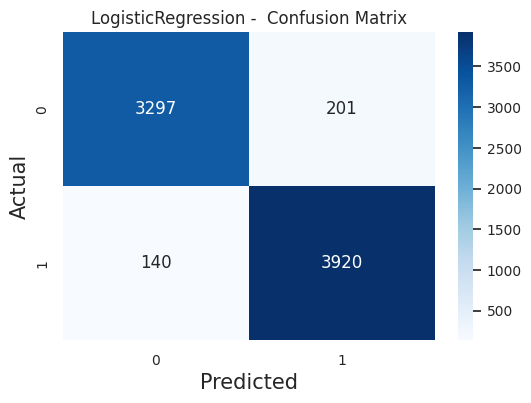

In [45]:
# validation models
index = 0


while index < 4:

    if index == 0:
        model_name = 'Naive Bayes Classifier - '
        model = BNB
    elif index == 1:
        model_name = 'Decision Tree Classifier - '
        model = DTC
    elif index == 2:
        model_name = 'KNeighborsClassifier - '
        model = KNN
    else:
        model_name = 'LogisticRegression - '
        model = LGR

    # accuracy of the model
    accuracy_model = metrics.accuracy_score(Y_test, model.predict(X_test))

    # confusion matrix
    confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))

    # classification
    classification_model = metrics.classification_report(Y_test, model.predict(X_test))


    print(f'<<<<<<<<<<==================== {model_name} Model Test Results ====================>>>>>>>>>>')
    print("\nModel Accuracy:\n", accuracy_model)
    print("\nClassification report:\n", classification_model)
    print("\nConfusion matrix:\n", confusion_matrix)
    print()


    index += 1

index = 0

# naive bayes, decision tree, KNN, Logistic
while index < 4:
    if index == 0:
        model_name = 'Naive Bayes Classifier - '
        model = BNB
    elif index == 1:
        model_name = 'Decision Tree Classifier - '
        model = DTC
    elif index == 2:
        model_name = 'KNeighborsClassifier - '
        model = KNN
    else:
        model_name = 'LogisticRegression - '
        model = LGR

    # plot the heat map for the models
    plt.figure(figsize=(6, 4))
    sns.heatmap(metrics.confusion_matrix(Y_test, model.predict(X_test)), annot=True, fmt="d", cmap="Blues")
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # increment by 1
    index += 1


# Predictions

In [46]:
# predictions
predictions_df = {}
classifier_weights = {}
threshold = 0.9

test_data=pd.read_csv(test_file_path)

for feature in train_x.columns:
    if feature != 'class':
        X = train_x.drop(columns=[feature])
        y = train_x[feature]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        if feature in ['duration', 'src_bytes', 'dst_bytes', 'land']:
            classifier = KNeighborsClassifier()
        elif feature in ['protocol_type', 'service', 'flag']:
            classifier = BernoulliNB()
        else:
            classifier = LogisticRegression()

        classifier.fit(train_x, train_y)

        predictions = classifier.predict(train_x)
        predictions_df[feature] = predictions
        classifier_weights[feature] = 0.5

predictions_df = pd.DataFrame(predictions_df)
predictions_df_numeric = predictions_df.replace({'normal': 0, 'anomaly': 1})

# weighted avg predictions
if classifier_weights:
    weighted_predictions = predictions_df_numeric.copy()
    for col, weight in classifier_weights.items():
        weighted_predictions[col] *= weight

    predictions_df['Weighted_Average_Prediction'] = weighted_predictions.sum(axis=1)
    test_data['Weighted_Average_Prediction'] = weighted_predictions.sum(axis=1)
else:
    predictions_df['Average_Prediction'] = predictions_df_numeric.mean(axis=1)
    test_data['Average_Prediction'] = predictions_df_numeric.mean(axis=1)


if classifier_weights:
    predictions_df['Intrusion_Detected'] = predictions_df['Weighted_Average_Prediction'] > threshold
    test_data['Intrusion_Detected'] = test_data['Weighted_Average_Prediction'] > threshold
else:
    predictions_df['Intrusion_Detected'] = predictions_df['Average_Prediction'] > threshold
    test_data['Intrusion_Detected'] = test_data['Average_Prediction'] > threshold

intrusion_instances = predictions_df[predictions_df['Intrusion_Detected']]

intrusion_features = intrusion_instances.drop(['Intrusion_Detected', 'Weighted_Average_Prediction'], axis=1)
intrusion_features = intrusion_features.replace({'normal': 0, 'anomaly': 1})

intrusion_features_mean = intrusion_features.mean()
intrusion_features_mean_sorted = intrusion_features_mean.sort_values(ascending=False)

print("Features with high values for intrusion instances:")
print(intrusion_features_mean_sorted)

Features with high values for intrusion instances:
duration                       0.931152
src_bytes                      0.931152
dst_bytes                      0.931152
land                           0.931152
wrong_fragment                 0.913722
urgent                         0.913722
hot                            0.913722
num_failed_logins              0.913722
logged_in                      0.913722
num_compromised                0.913722
root_shell                     0.913722
su_attempted                   0.913722
num_root                       0.913722
num_file_creations             0.913722
num_shells                     0.913722
num_access_files               0.913722
is_host_login                  0.913722
is_guest_login                 0.913722
count                          0.913722
srv_count                      0.913722
serror_rate                    0.913722
srv_serror_rate                0.913722
rerror_rate                    0.913722
srv_rerror_rate              

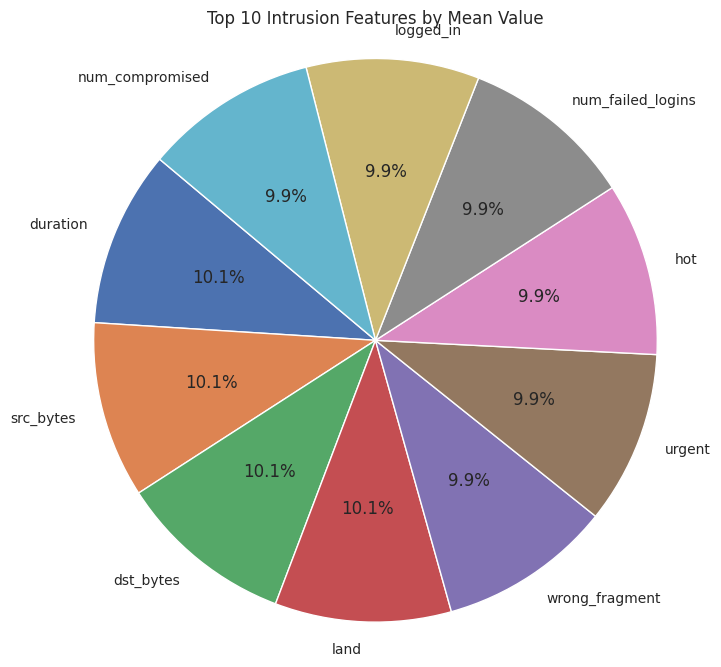

In [47]:
top_10_intrusion_features = intrusion_features_mean_sorted.head(10)

# pie chart for top 10 intrusion features which are important
plt.figure(figsize=(8, 8))
plt.pie(top_10_intrusion_features, labels=top_10_intrusion_features.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Intrusion Features by Mean Value')
plt.axis('equal')
plt.show()

In [48]:
intrusion_df_train = pd.DataFrame({
    'service': test_data['service'],
    'intruded': test_data['Intrusion_Detected']
})

# intrusion file which stores the intrusion service for the train data.
intrusion_df_train.to_csv('intrusion_services_train.csv', index=False)
print("CSV file 'intrusion_services_train.csv' has been created with service and intrusion information based on train_x.")

intrusion_count_by_service = test_data.groupby('service')['Intrusion_Detected'].sum()
most_intruded_service = intrusion_count_by_service.idxmax()
max_intrusions = intrusion_count_by_service.max()

print("Service with the most intrusions:", most_intruded_service)
print("Number of intrusions:", max_intrusions)

CSV file 'intrusion_services_train.csv' has been created with service and intrusion information based on train_x.
Service with the most intrusions: http
Number of intrusions: 3959


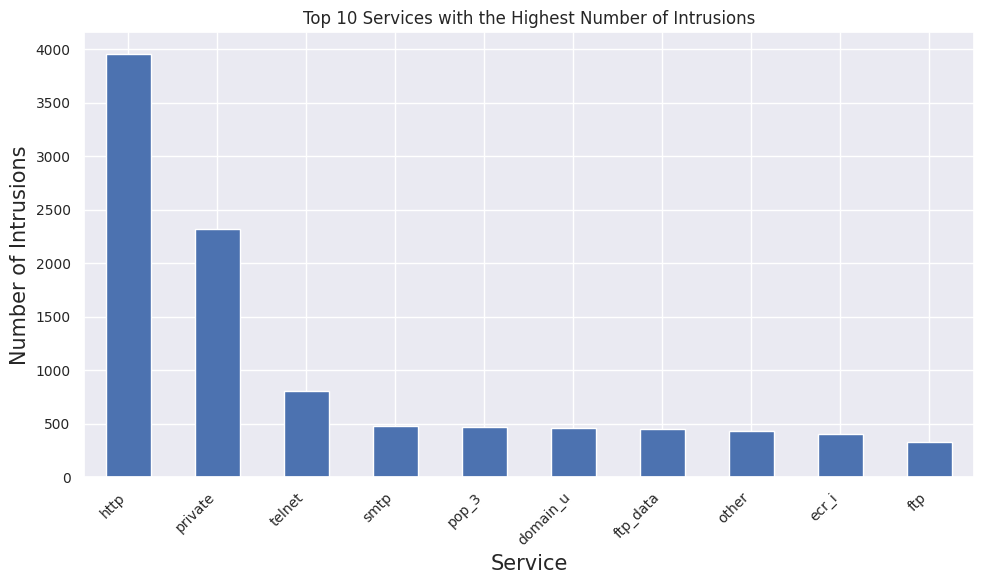

In [49]:
intrusion_count_by_service_sorted = intrusion_count_by_service.sort_values(ascending=False)
top_10_intrusion_count = intrusion_count_by_service_sorted.head(10)

# plot the top 10 with highest number of intrusion
plt.figure(figsize=(10, 6))
top_10_intrusion_count.plot(kind='bar')
plt.title('Top 10 Services with the Highest Number of Intrusions')
plt.xlabel('Service')
plt.ylabel('Number of Intrusions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
